# The figures in theory and methods chapters generated using python

In [1]:
import nibabel as nib
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image

## Figure 2.3 - Comparison of regular PrD and CROWN PrD modalities for HC and PD patient

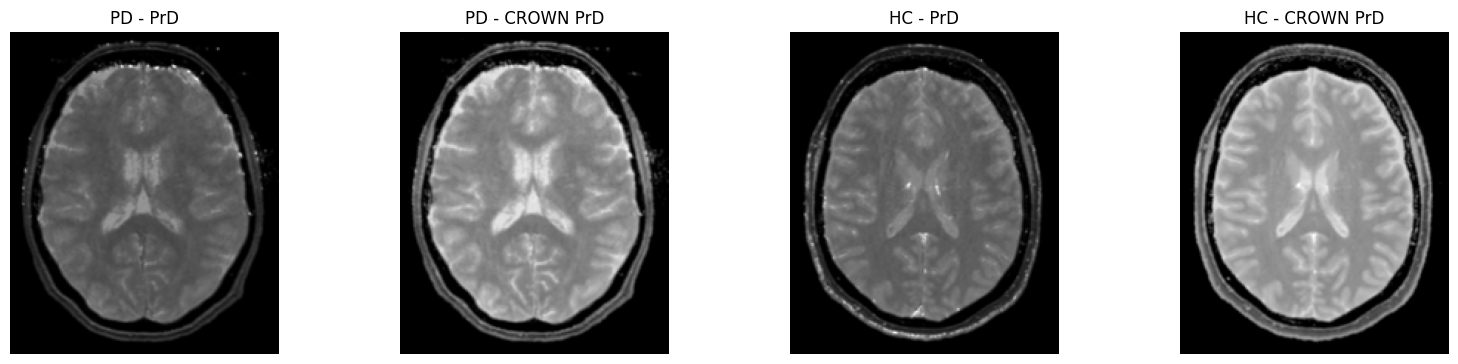

In [2]:
# randomly selected patient and healthy control participant
base_dir_pd = "/hus/home/oliwin/data/study_name/00006431/FSL"
base_dir_hc = "/hus/home/oliwin/data/study_name/0000997A/FSL"

# PrD and CROWN PrD modalities for patient and healthy control participant
modalities_pd = [
    "STAGE_PD_MAP_reg_mni.nii.gz", 
    "STAGE_CROWN_PD_MAP_reg_mni.nii.gz"
]

modalities_hc = [
    "STAGE_TRUE_PD_MAP_reg_mni.nii.gz",  
    "STAGE_CROWN_TRUE_PD_MAP_reg_mni.nii.gz"
]

# loads the images using nibabel, extracts slice at index 90 and rotates images 90 degrees
def img_slice(base_dir, filename, slice_index):
    img = nib.load(os.path.join(base_dir, filename))
    img_data = img.get_fdata()
    img_data = img_data - np.min(img_data)  
    img_data = img_data / np.max(img_data)
    slice_data = img_data[:, :, slice_index] 
    return np.rot90(slice_data)  


z_slice_index = 90 

slice_pd_1 = img_slice(base_dir_pd, modalities_pd[0], z_slice_index)
slice_pd_2 = img_slice(base_dir_pd, modalities_pd[1], z_slice_index)
slice_hc_1 = img_slice(base_dir_hc, modalities_hc[0], z_slice_index)
slice_hc_2 = img_slice(base_dir_hc, modalities_hc[1], z_slice_index)

# plotting the images
fig, axes = plt.subplots(1, 4, figsize=(16, 4)) 
axes = axes.ravel()

axes[0].imshow(slice_pd_1, cmap='gray')
axes[0].set_title("PD - PrD")
axes[0].axis('off')

axes[1].imshow(slice_pd_2, cmap='gray')
axes[1].set_title("PD - CROWN PrD")
axes[1].axis('off')

axes[2].imshow(slice_hc_1, cmap='gray')
axes[2].set_title("HC - PrD")
axes[2].axis('off')

axes[3].imshow(slice_hc_2, cmap='gray')
axes[3].set_title("HC - CROWN PrD")
axes[3].axis('off')

# displaying the collage
plt.tight_layout(pad=2)
prd_img = "/hus/home/oliwin/data/study_name/row_collage.png"
plt.savefig(prd_img, dpi=600)  
plt.show()

## Figures 3.6 and 3.7 - MRI image generated to show putamen and white matter regions (the regions were manually drawn later)

Voxel value at [117, 149, 90]: 248.0


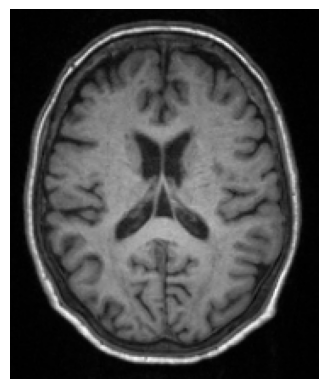

In [3]:
# randomly selected pigd patient
base_dir = "/hus/home/oliwin/data/study_name/00006431/FSL"
filename = "mprage_reg_mni.nii.gz"

# loading the image using nibabel
nii_path = f"{base_dir}/{filename}"
img = nib.load(nii_path)
data = img.get_fdata()

# coordinates selected after viewing the slice in FSLeyes
fsleyes_coordinates = [117, 149, 90] 

voxel_value = data[fsleyes_coordinates[0], fsleyes_coordinates[1], fsleyes_coordinates[2]]
print(f"Voxel value at {fsleyes_coordinates}: {voxel_value}")

# extracting and normalizing 2D slice
slice_2d = data[:, :, fsleyes_coordinates[2]]
slice_2d_normalized = np.uint8((slice_2d - np.min(slice_2d)) / (np.max(slice_2d) - np.min(slice_2d)) * 255)

# rotating the images 90 degrees
image = Image.fromarray(slice_2d_normalized)  
image = image.rotate(90, expand=True)

# displaying the image
plt.imshow(image, cmap='gray')
plt.axis('off')  
plt.show()

image.save('axial_slice_wm_putamen.png')

## Figures 3.4 and 3.5 - MRI image generated to show SNpc and LC regions (the regions were manually drawn later)

Voxel value at [90, 99, 60]: 301.0


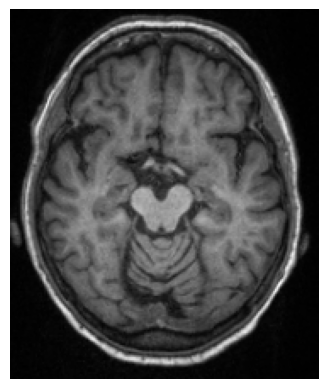

In [4]:
# randomly selected pigd patient
base_dir = "/hus/home/oliwin/data/study_name/00006431/FSL"
filename = "mprage_reg_mni.nii.gz"
nii_path = f"{base_dir}/{filename}"

# loading the image using nibabel
img = nib.load(nii_path)
data = img.get_fdata()

# coordinates selected after viewing the slice in FSLeyes
fsleyes_coordinates = [90, 99, 60]

voxel_value = data[fsleyes_coordinates[0], fsleyes_coordinates[1], fsleyes_coordinates[2]]
print(f"Voxel value at {fsleyes_coordinates}: {voxel_value}")

# extracting and normalizing 2D slice
slice_2d = data[:, :, fsleyes_coordinates[2]]
slice_2d_normalized = np.uint8((slice_2d - np.min(slice_2d)) / (np.max(slice_2d) - np.min(slice_2d)) * 255)

# rotating the image 90 degrees
image = Image.fromarray(slice_2d_normalized)
image = image.rotate(90, expand=True)

# displaying the image
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

image.save('axial_slice_sn_lc.png')
